In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

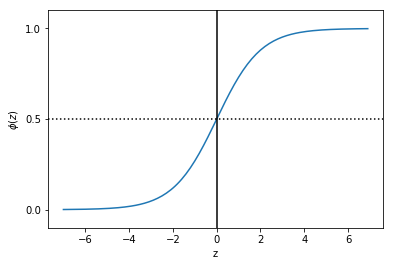

In [3]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [4]:
v_data=pd.read_table("Vertebral.dat", sep="\s+", header=None)
v_data.columns=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spon','class']
v_data['class'] = v_data['class'].map({'DH': 1, 'SL': 2, 'NO': 3})
v_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spon,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [5]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X, y = v_data.iloc[:, [4, 5]].values, v_data['class']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=10)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
lr = LogisticRegression(C=1000.0, random_state=0)
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [8]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

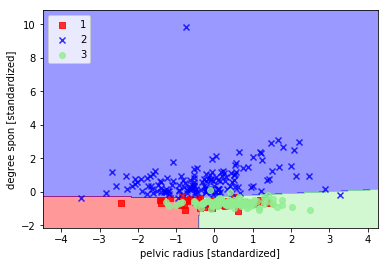

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=lr)
plt.xlabel('pelvic radius [standardized]')
plt.ylabel('degree spon [standardized]')
plt.legend(loc='upper left')
plt.show()

In [10]:
print("Accuracy on the training set: %.3f" % lr.score(X_train,y_train))
print("Accuracy on the testing set: %.3f" % lr.score(X_test,y_test))

Accuracy on the training set: 0.770
Accuracy on the testing set: 0.806


In [11]:
v_data1=v_data
v_data1['class'] = v_data1['class'].map({'DH': 1, 'SL': 1, 'NO': 2})
v_data1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spon,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,NaN
1,39.06,10.06,25.02,29.00,114.41,4.56,NaN
2,68.83,22.22,50.09,46.61,105.99,-3.53,NaN
3,69.30,24.65,44.31,44.64,101.87,11.21,NaN
4,49.71,9.65,28.32,40.06,108.17,7.92,NaN
